In [1]:
# import libraries
import numpy as np
import odl
%matplotlib inline

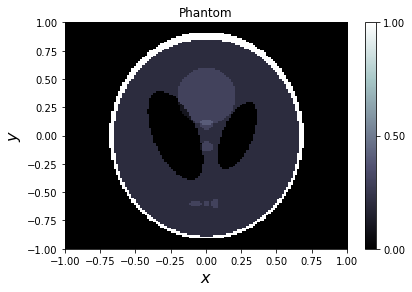

<Figure size 432x288 with 0 Axes>

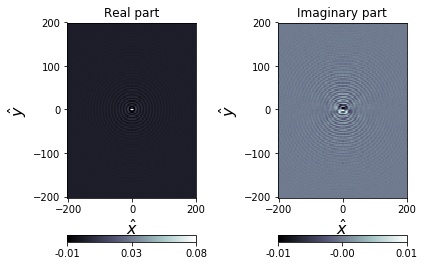

<Figure size 432x288 with 0 Axes>

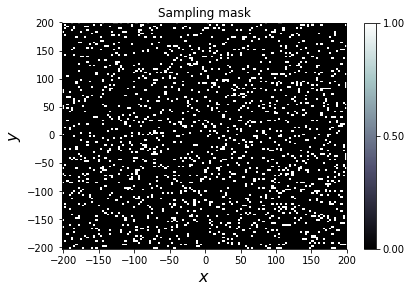

<Figure size 432x288 with 0 Axes>

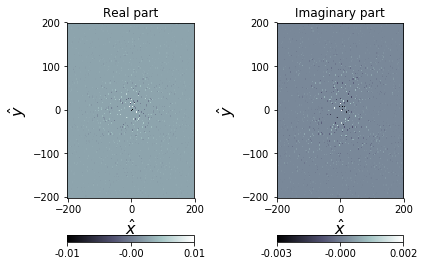

<Figure size 432x288 with 0 Axes>

In [33]:
# Parameters
n = 128
subsampling = 0.1  # propotion of data to use
lam = 0.003
delta = 0

# Create a space
space = odl.uniform_discr([-1, -1], [1, 1], [n, n])

# Create MRI operator. First fourier transform, then subsample
F = odl.trafos.FourierTransform(space,halfcomplex=False)
sampling_points = np.random.rand(*F.range.shape) < subsampling
S = F.range.element(sampling_points)
K = S * F

# Create noisy MRI data
u = odl.phantom.shepp_logan(space, modified=True)
f = K(u)
f_delta = f + delta * odl.phantom.white_noise(K.range)

u.show('Phantom')
F(u).show('Fourier transform')
S.real.show('Sampling mask')
f_delta.show('Noisy MRI data');

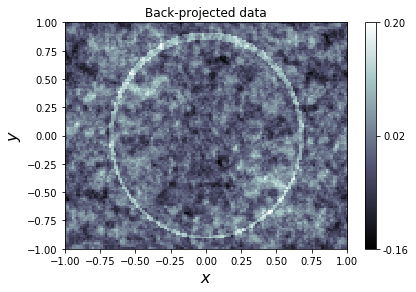

<Figure size 432x288 with 0 Axes>

In [35]:
u_bp = K.adjoint(f_delta)
u_bp.show(title='Back-projected data');


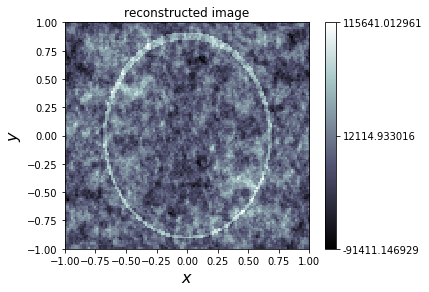

<Figure size 432x288 with 0 Axes>

In [41]:
# Choose a starting point
u_cg = K.domain.zero()

# Run the algorithm
odl.solvers.conjugate_gradient_normal(K, u_cg, f_delta, niter=20)

# Display images
u_cg.show(title='reconstructed image');

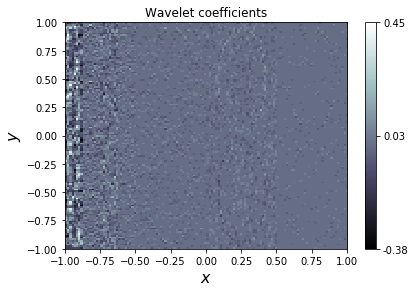

<Figure size 432x288 with 0 Axes>

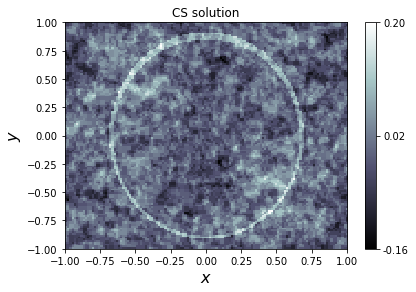

<Figure size 432x288 with 0 Axes>

In [69]:
# Make the Wavelet transform operator on this space. The range is calculated
# automatically. The default backend is PyWavelets (pywt).
W = odl.trafos.WaveletTransform(space, wavelet='Haar', nlevels=2)

def treshold(c,tau):
    for k in range(len(c)):
        if abs(c_sp[k])<=tau:
            c[k]=0

c_sp = W(K.adjoint(f_delta))
u_sp = W.inverse(treshold(c_sp,0.03))

space.element(c_sp.asarray().reshape(space.shape)).show('Wavelet coefficients')
u_sp.show('CS solution');